In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1= pd.read_csv("Bengaluru_House_Data.csv")
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

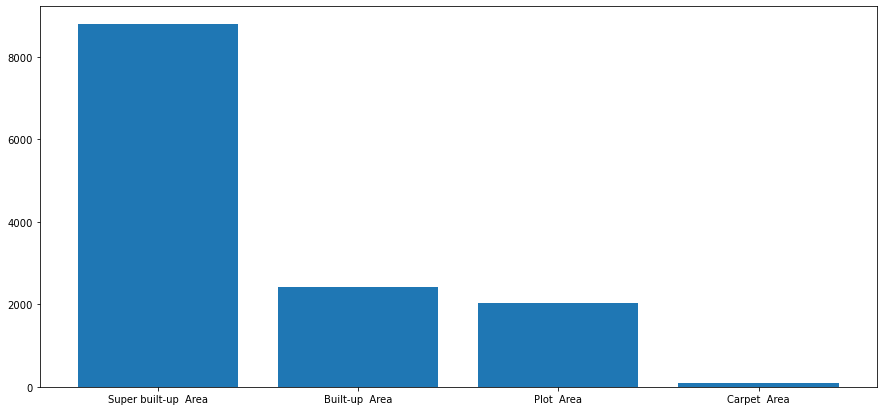

In [11]:
plt.figure(figsize=(15,7))
plt.bar(df1['area_type'].value_counts().index,df1['area_type'].value_counts().values)
plt.show()

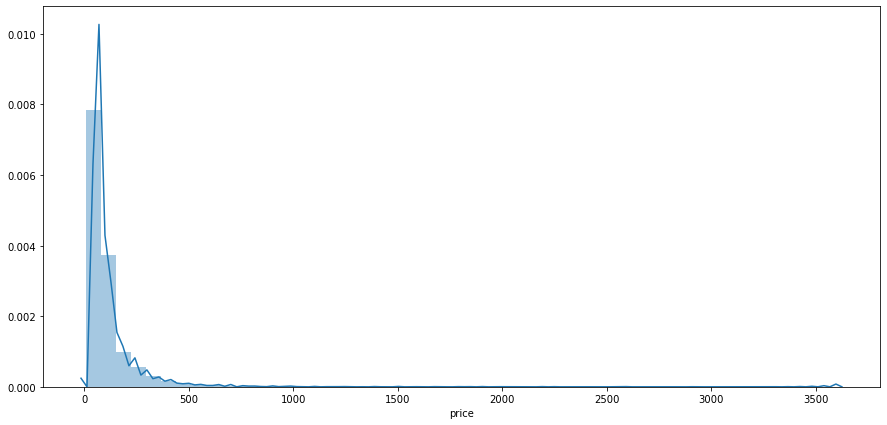

In [16]:
plt.figure(figsize=(15,7)) 
sn.distplot(df1['price']) 
plt.show()

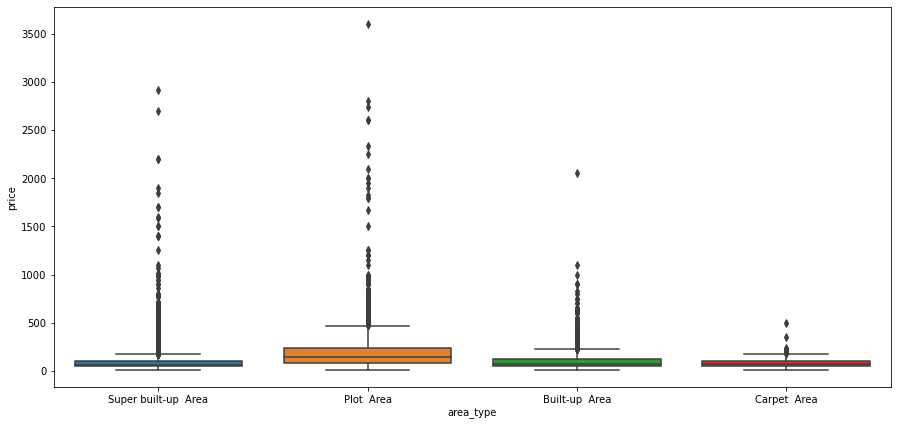

In [21]:
plt.figure(figsize=(15,7))
sn.boxplot(data=df1,x=df1['area_type'],y=df1['price'])
plt.show()

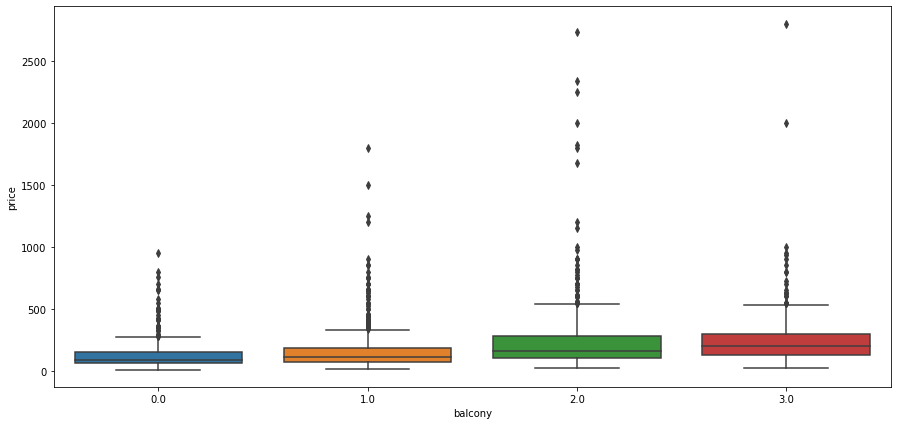

In [18]:
sub_data = df1[df1['area_type'] == 'Plot  Area']
plt.figure(figsize=(15,7))
sn.boxplot(data=sub_data,x=sub_data['balcony'],y=sub_data['price'])
plt.show()

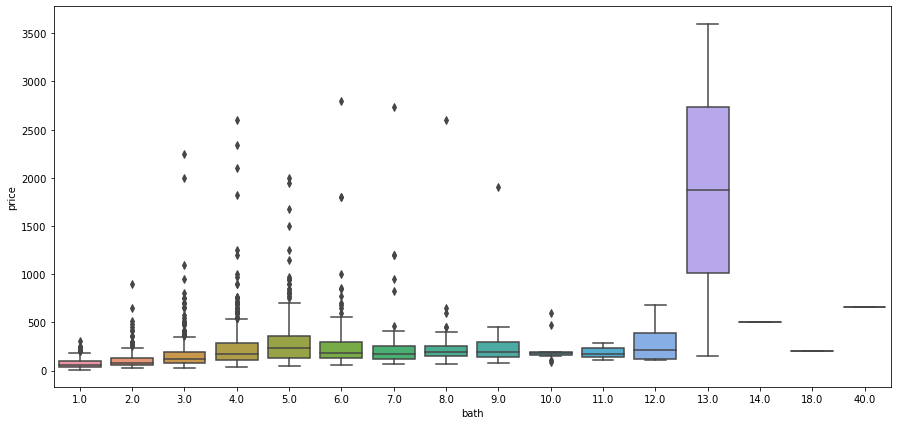

In [23]:
plt.figure(figsize=(15,7)) 
sn.boxplot(data=sub_data,x=sub_data['bath'],y=sub_data['price']) 
plt.show()

In [27]:
df2= df1.drop(['area_type','availability','society','balcony'],axis=1)
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [28]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

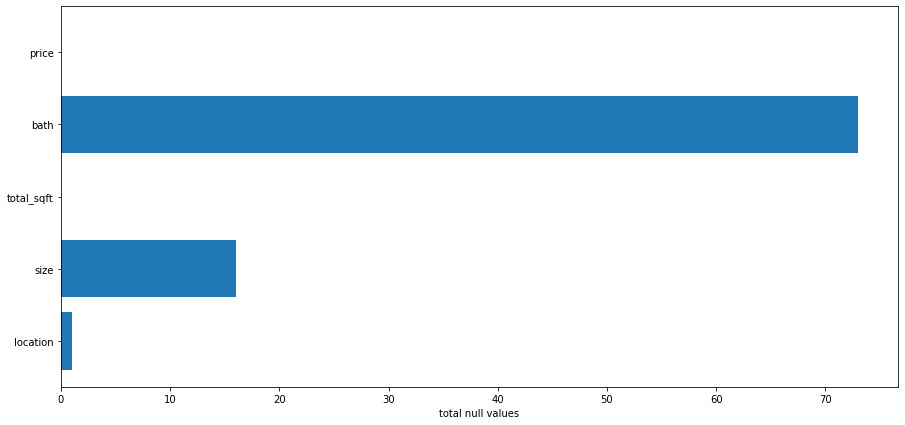

In [29]:
plt.figure(figsize=(15,7))
plt.barh(df2.isnull().sum().index,width=df2.isnull().sum().values)
plt.xlabel('total null values')
plt.show()

In [31]:
df3=df2.dropna()
df3.head()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [32]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]) )

<ipython-input-33-0e37898ad227>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]) )


In [34]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [35]:
def isfloat(x):
    try:
        float(x)
    except: return False
    return True
        

In [36]:

df3[~df3['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [37]:
def sqft_to_num(x):
    tocken=x.split('-')
    if(len(tocken)==2):
            return (float(tocken[0])+float(tocken[1]))/2
    try: 
        return(float(x))
    except:
        return None
    

In [38]:
df4=df3.copy()

In [39]:
sqft_to_num('2122')

2122.0

In [40]:
df4['total_sqft']=df4['total_sqft'].apply(sqft_to_num)

In [41]:
len(df4['location'].unique())

1304

In [42]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [43]:
df5['location']=df5['location'].apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending=False)

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [44]:
len(location_stats[location_stats<=10]) 

1052

In [45]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [46]:
len(df5['location'].unique())

1293

In [47]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)
len(df5['location'].unique())

242

In [48]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [49]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]


In [50]:
df6.head()
df6.shape

(12502, 7)

In [51]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [52]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_outliers(df6)
df7.shape

(10241, 7)

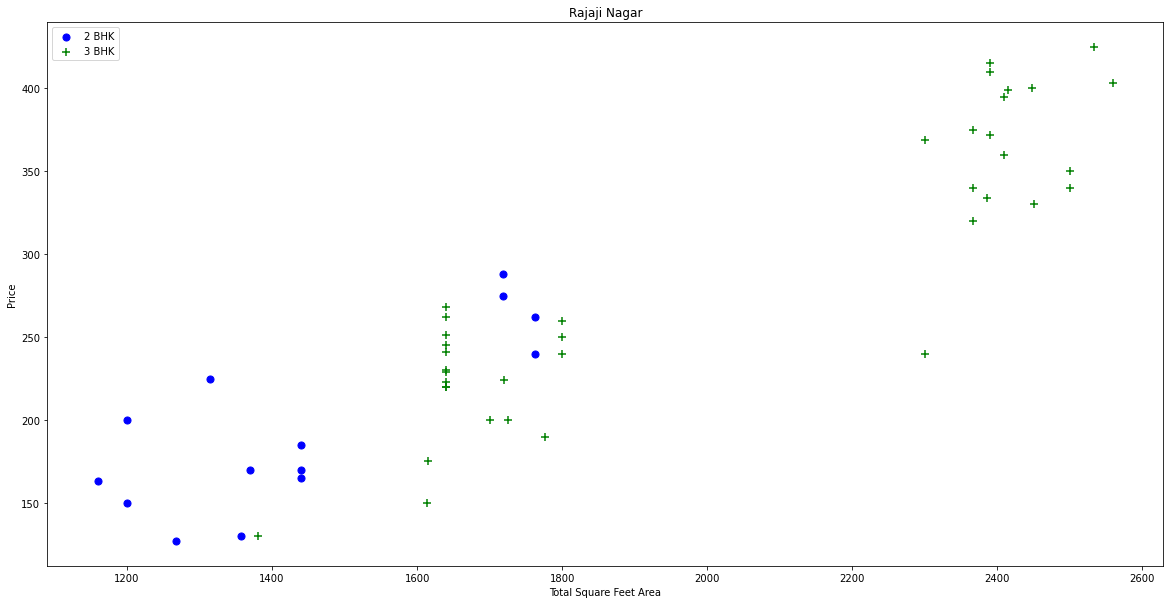

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

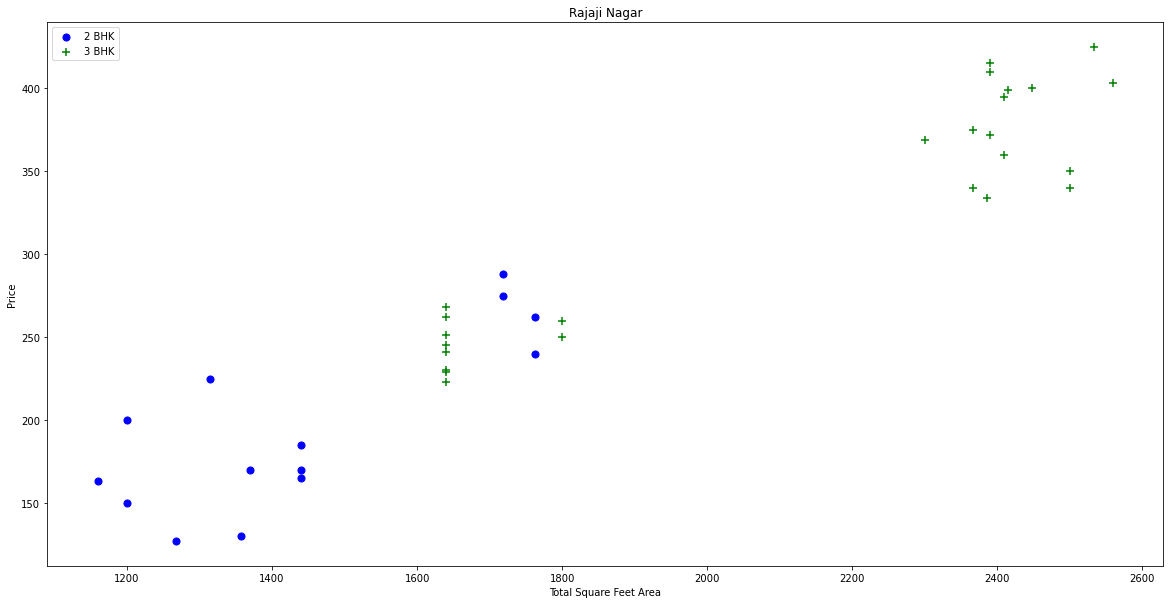

In [55]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [56]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [57]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [58]:
df10=df9.drop(['size','price_per_sqft'],axis=1)
df10.shape
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [59]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df12.shape

(7251, 245)

In [63]:
x=df12.drop('price',axis=1)
y=df12.price

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

models=[]
models.append(('LR',LinearRegression()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('rf',RandomForestRegressor(n_estimators=10)))
results=[]
for name, model in models:
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print("SCORE OF {} IS:".format(name),model.score(x_test,y_test))
    accuracies=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
    print("CROSS VAL SCORE OF {} IS:".format(name),accuracies.mean())
    print("MEAN SQUARED ERROR OF {} IS:".format(name),mean_squared_error( ypred,y_test))

SCORE OF LR IS: 0.8452277697874391
CROSS VAL SCORE OF LR IS: 0.8293017767622309
MEAN SQUARED ERROR OF LR IS: 783.2659935249737
SCORE OF DT IS: 0.7328199621063968
CROSS VAL SCORE OF DT IS: 0.7130555293924024
MEAN SQUARED ERROR OF DT IS: 1352.135570724555
SCORE OF rf IS: 0.7837444024786344
CROSS VAL SCORE OF rf IS: 0.7812387150972955
MEAN SQUARED ERROR OF rf IS: 1094.4189097442002


In [66]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.score(x_test,y_test))
ypred=regressor.predict(x_test)
print(ypred)

0.8452277697874391
[70.47896311 33.09312356 36.00433051 ... 29.45805298 58.43306285
 68.60105208]


In [67]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=x_train,y=y_train,cv=10)
accuracies.mean()
from sklearn.metrics import mean_squared_error
mean_squared_error( ypred,y_test)

783.2659935249737

In [70]:
def predict_house_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return regressor.predict([X])[0]

In [71]:
predict_house_price("1st Phase JP Nagar",1000,2,2)

83.49904677211988

In [72]:
import pickle
with open('house_price_predict_model.pickle','wb')as f:
    pickle.dump(regressor,f)
    f.close()

In [73]:
with open('house_price_predict_model.pickle','rb') as f:
    model = pickle.load(f)
    f.close()

In [47]:
import json
data_col= {'columns': [ col.lower() for col in x.columns]
}

In [48]:
data_col

{'columns': ['total_sqft',
  'bath',
  'bhk',
  '1st block jayanagar',
  '1st phase jp nagar',
  '2nd phase judicial layout',
  '2nd stage nagarbhavi',
  '5th block hbr layout',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'abbigere',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'anjanapura',
  'ardendale',
  'arekere',
  'attibele',
  'beml layout',
  'btm 2nd stage',
  'btm layout',
  'babusapalaya',
  'badavala nagar',
  'balagere',
  'banashankari',
  'banashankari stage ii',
  'banashankari stage iii',
  'banashankari stage v',
  'banashankari stage vi',
  'banaswadi',
  'banjara layout',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'billekahalli',
  'binny pete',

In [1]:
with open ('columns_data.json','w') as j:
    json.dump(data_col, j)

NameError: name 'json' is not defined

In [2]:
import pickle
import numpy as np
import tkinter as tk
import PIL.Image
import PIL.ImageTk
import json
root=tk.Tk()
root.title('BANGLORE_HOUSE_PRICING')

canvas = tk.Canvas(root, height=550, width=700)
im = PIL.Image.open("a.jpeg")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)
label1=tk.Label(root,text='LOCATION',bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
label1.place(relx=0.3, rely=0.12, relwidth=0.38, relheight=0.1, anchor='n')

label2=tk.Label(root,text='TOTAL SQFT AREA',bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
label2.place(relx=0.3, rely=0.24, relwidth=0.38, relheight=0.1, anchor='n')

label3=tk.Label(root,text='NUMBER OF BATHROOMS',bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
label3.place(relx=0.3, rely=0.36, relwidth=0.38, relheight=0.1, anchor='n')

label4=tk.Label(root,text='HOW MANY BHK',bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
label4.place(relx=0.3, rely=0.48, relwidth=0.38, relheight=0.1, anchor='n')



loc=tk.StringVar()
e1= tk.Entry(root, width=16,textvariable=loc,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.63, rely=0.13, relwidth=0.33, relheight=0.1)

total_sqft=tk.DoubleVar()
e1= tk.Entry(root, width=16,textvariable=total_sqft,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.63, rely=0.24, relwidth=0.33, relheight=0.1)

bathrooms=tk.DoubleVar()
e1= tk.Entry(root, width=16,textvariable=bathrooms,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.63, rely=0.36, relwidth=0.33, relheight=0.1)

bhk_house=tk.DoubleVar()
e1= tk.Entry(root, width=16,textvariable=bhk_house,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.63, rely=0.48, relwidth=0.33, relheight=0.1)


__model = None
__data_columns = None



if __model is None:
    with open('house_price_predict_model.pickle', 'rb') as f:
        __model = pickle.load(f)


with open("columns_data.json", "r") as f:
        __data_columns = json.load(f)['columns']

def predict():
    location=loc.get()
    sqft=total_sqft.get()
    bath=bathrooms.get()
    bhk=bhk_house.get()

    
    try:
        loc_index = __data_columns.index(location.lower())
    except:
        loc_index = -1

    x = np.zeros(len(__data_columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1

    prediction=round( __model.predict([x])[0],2)
    
    label = tk.Label(root,text='PRICE IN LAKHS',relief='sunken')
    label.config(bg='#074d5e',fg='#FFFFFF',font=('Courier', 16,'bold'))
    label.place(relx=0.20, rely=0.85, relwidth=0.4, relheight=0.065)
    
    label = tk.Label(root,text=prediction,relief='sunken')
    label.config(bg='#074d5e',fg='#FFFFFF',font=('Courier', 16,'bold'))
    label.place(relx=0.65, rely=0.85, relwidth=0.3, relheight=0.065)

submit=tk.Button(root,width=6,text='PREDICT', command=lambda : predict())
submit.config(bg='#eeeeee', fg='black', font=('Courier', 12, 'bold'),border=5)
submit.place(relx=0.45, rely=0.65, relwidth=0.20, relheight=0.09)

canvas.pack()
root.mainloop()

FileNotFoundError: [Errno 2] No such file or directory: 'a.jpeg'